Best bandwidth: 1.157, Silhouette Score: 0.702


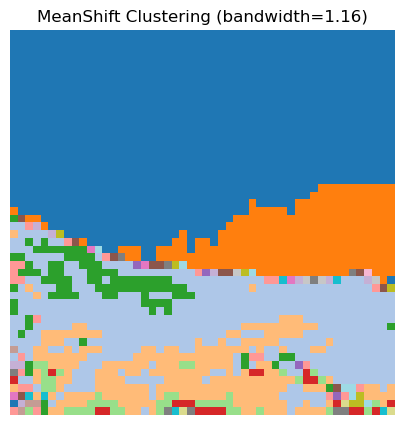

In [1]:
 import rasterio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score

with rasterio.open('GRAY_HR_SR_OB.tif') as src:
    image_arr = src.read()

sub_image = image_arr[0][3120:3170, 13750:13800]
X = sub_image.reshape(-1, 1)

bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

best_score = -1
best_bw = bandwidth
best_labels = None

for bw in np.linspace(bandwidth*0.5, bandwidth*1.5, 5):
    ms = MeanShift(bandwidth=bw)
    labels = ms.fit_predict(X)
    if len(set(labels)) > 1:
        score = silhouette_score(X, labels)
        if score > best_score:
            best_score = score
            best_bw = bw
            best_labels = labels

print(f'Best bandwidth: {best_bw}, Silhouette Score: {best_score:.3f}')

clustered_img = best_labels.reshape(sub_image.shape)
plt.figure(figsize=(5,5))
plt.title(f'MeanShift Clustering (bandwidth={best_bw:.2f})')
plt.imshow(clustered_img, cmap='tab20')
plt.axis('off')
plt.show()